In [3]:
!pip install qiskit mitiq matplotlib --quiet



In [4]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.providers.aer.noise import NoiseModel, depolarizing_error
from mitiq import zne
import matplotlib.pyplot as plt



ImportError: cannot import name 'Aer' from 'qiskit' (C:\Users\anvit\myenv\Lib\site-packages\qiskit\__init__.py)

In [5]:
!pip install qiskit-aer --quiet



In [6]:
from qiskit import QuantumCircuit, execute
from qiskit_aer import Aer
from qiskit.providers.aer.noise import NoiseModel, depolarizing_error
from mitiq import zne
import matplotlib.pyplot as plt


ImportError: cannot import name 'execute' from 'qiskit' (C:\Users\anvit\myenv\Lib\site-packages\qiskit\__init__.py)

In [7]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit.providers.aer.noise import NoiseModel, depolarizing_error
from mitiq import zne
import matplotlib.pyplot as plt


ModuleNotFoundError: No module named 'qiskit.providers.aer'

In [8]:
from qiskit_aer.noise import NoiseModel, depolarizing_error
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
import matplotlib.pyplot as plt
from mitiq import zne


In [9]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(1, 1)
qc.h(0)          # Give her that Hadamard glow-up
qc.measure(0, 0) # Don't forget to clock the look!
qc.draw('mpl')



MissingOptionalLibraryError: "The 'pylatexenc' library is required to use 'MatplotlibDrawer'. You can install it with 'pip install pylatexenc'."

In [10]:
pip install pylatexenc --quiet


Note: you may need to restart the kernel to use updated packages.


In [1]:
qc = QuantumCircuit(1, 1)
qc.h(0)
qc.measure(0, 0)
qc.draw('mpl')  # Now serving looks! 💃


NameError: name 'QuantumCircuit' is not defined

In [3]:
from qiskit_aer.noise import NoiseModel, depolarizing_error
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
import matplotlib.pyplot as plt
from mitiq import zne

In [4]:
!pip install qiskit-aer --quiet



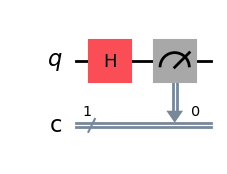

In [5]:
from qiskit import QuantumCircuit

qc = QuantumCircuit(1, 1)
qc.h(0)          # Give her that Hadamard glow-up
qc.measure(0, 0) # Don't forget to clock the look!
qc.draw('mpl')


In [6]:
from qiskit_aer.noise import NoiseModel, depolarizing_error

noise_model = NoiseModel()
noise_model.add_all_qubit_quantum_error(depolarizing_error(0.2, 1), ['h'])


In [7]:
from qiskit_aer import Aer
from qiskit import transpile

def execute_with_noise(circuit):
    backend = Aer.get_backend('qasm_simulator')
    tqc = transpile(circuit, backend)
    job = backend.run(tqc, shots=1000, noise_model=noise_model)
    counts = job.result().get_counts()
    return counts.get('0', 0) / 1000


In [8]:
raw_result = execute_with_noise(qc)
print("Noisy result (probability of 0):", raw_result)


Noisy result (probability of 0): 0.493


In [9]:
from mitiq import zne

mitigated_result = zne.execute_with_zne(qc, execute_with_noise)
print("Mitigated result (probability of 0):", mitigated_result)


ModuleNotFoundError: No module named 'ply'

In [10]:
pip install ply --quiet


Note: you may need to restart the kernel to use updated packages.


In [1]:
qc = QuantumCircuit(1, 1)
qc.h(0)          # Hadamard - superposition realness
qc.measure(0, 0) # Measure the drama
qc.draw('mpl')   # Serve that circuit look


NameError: name 'QuantumCircuit' is not defined

In [2]:
!pip install --quiet qiskit qiskit-aer mitiq matplotlib cirq ply


  error: subprocess-exited-with-error
  
  Preparing metadata (pyproject.toml) did not run successfully.
  exit code: 1
  
  [6 lines of output]
  
  Cargo, the Rust package manager, is not installed or is not on PATH.
  This package requires Rust and Cargo to compile extensions. Install it through
  the system's package manager or via https://rustup.rs/
  
  Checking for Rust toolchain....
  [end of output]
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
error: metadata-generation-failed

Encountered error while generating package metadata.

See above for output.

note: This is an issue with the package mentioned above, not pip.
hint: See above for details.


In [3]:
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer
from qiskit_aer.noise import NoiseModel, depolarizing_error
from mitiq import zne
import matplotlib.pyplot as plt



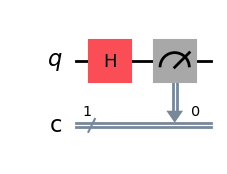

In [4]:
qc = QuantumCircuit(1, 1)
qc.h(0)          # Hadamard - superposition realness
qc.measure(0, 0) # Measure the drama
qc.draw('mpl')   # Serve that circuit look


In [5]:
!pip install --quiet qiskit qiskit-aer mitiq matplotlib ply


In [6]:
noise_model = NoiseModel()
noise_model.add_all_qubit_quantum_error(depolarizing_error(0.2, 1), ['h'])  # 20% depolarizing noise on H gate


In [7]:
def execute_with_noise(circuit):
    backend = Aer.get_backend('qasm_simulator')
    tqc = transpile(circuit, backend)
    job = backend.run(tqc, shots=1000, noise_model=noise_model)
    counts = job.result().get_counts()
    return counts.get('0', 0) / 1000


In [8]:
raw_result = execute_with_noise(qc)
print("Noisy result (probability of 0):", raw_result)


Noisy result (probability of 0): 0.489


In [9]:
mitigated_result = zne.execute_with_zne(qc, execute_with_noise)
print("Mitigated result (probability of 0):", mitigated_result)


C:\Users\anvit\myenv\Lib\site-packages\mitiq\zne\inference.py:97: UserWarning: The input circuit is very short. This may reduce the accuracy of noise scaling.
  warnings.warn(


Mitigated result (probability of 0): 0.5069999999999991


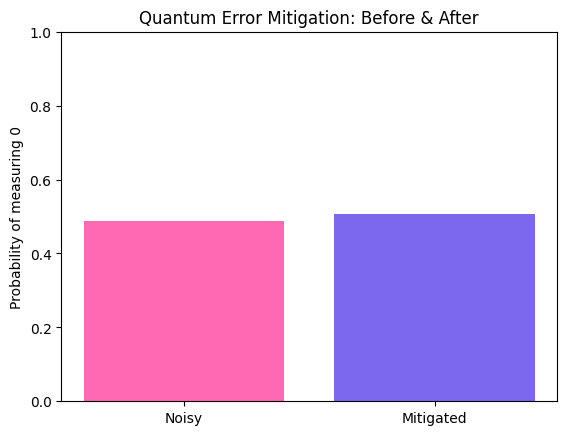

In [10]:
labels = ["Noisy", "Mitigated"]
values = [raw_result, mitigated_result]

plt.bar(labels, values, color=['hotpink', 'mediumslateblue'])
plt.ylabel("Probability of measuring 0")
plt.title("Quantum Error Mitigation: Before & After")
plt.ylim(0, 1)
plt.show()
